# Прогнозирование конечных свойств новых материалов (композиционных материалов)
Композиционные материалы - это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента)

## Импорты

In [206]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import scipy.stats as stats

## Загрузить и объединить датасет

### Загрузка данных

In [207]:
X_bp = pd.read_excel(
    'https://github.com/ritulupov/BKP/blob/main/data/X_bp.xlsx?raw=true',
     index_col=0)

X_nup = pd.read_excel(
    'https://github.com/ritulupov/BKP/blob/main/data/X_nup.xlsx?raw=true',
     index_col=0)

In [208]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


Есть 10 колонок тип данных float64. Строк 1024, пропусков нет.

In [209]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


Есть 3 колонки. 1 - int, 2 - float64. Строк 1040, пропусков нет.

### Объединение по индексу тип объединения INNER

In [210]:
full_df = X_bp.join(X_nup)

In [211]:
full_df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Поверхностная плотность, г/м2: **93.605670**

1)	Изучить теоретические основы и методы решения поставленной задачи.
2)	Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
3)	Провести предобработку данных (удаление шумов, нормализация и т.д.).
4)	Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
5)	Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
6)	Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
7)	Оценить точность модели на тренировочном и тестовом датасете. 
8)	Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.


## Разведочный анализ

### Тепловая карта корреляций
Никаких сильных корреляций нет.

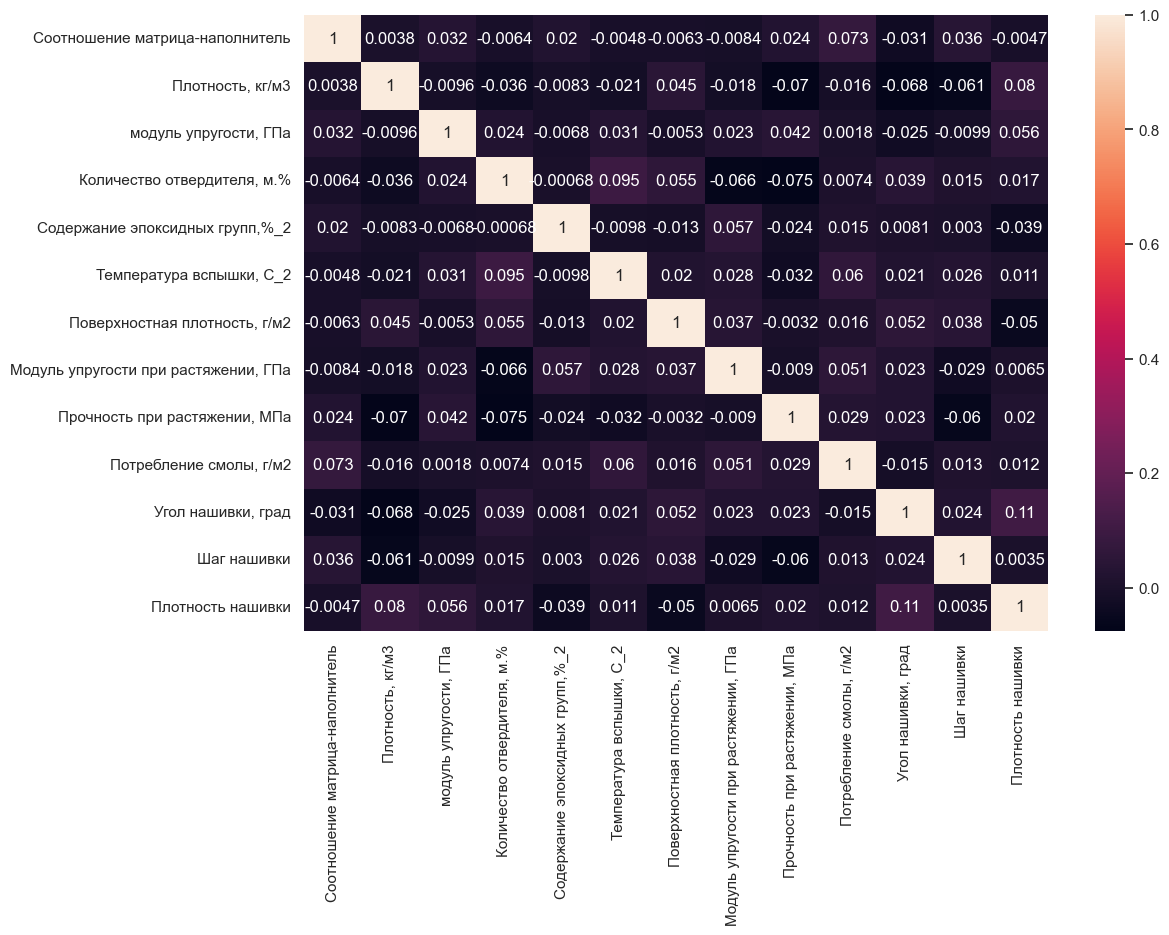

In [212]:
plt.figure(figsize=(12, 8))
sns.heatmap(full_df.corr(), annot=True, )
plt.show()

### Гистограммы распределения каждой из переменной, диаграммы ящика с усами
график распределения признака 'Поверхностная плотность, г/м2' сдвинут влево, серьезных выбросов нет.

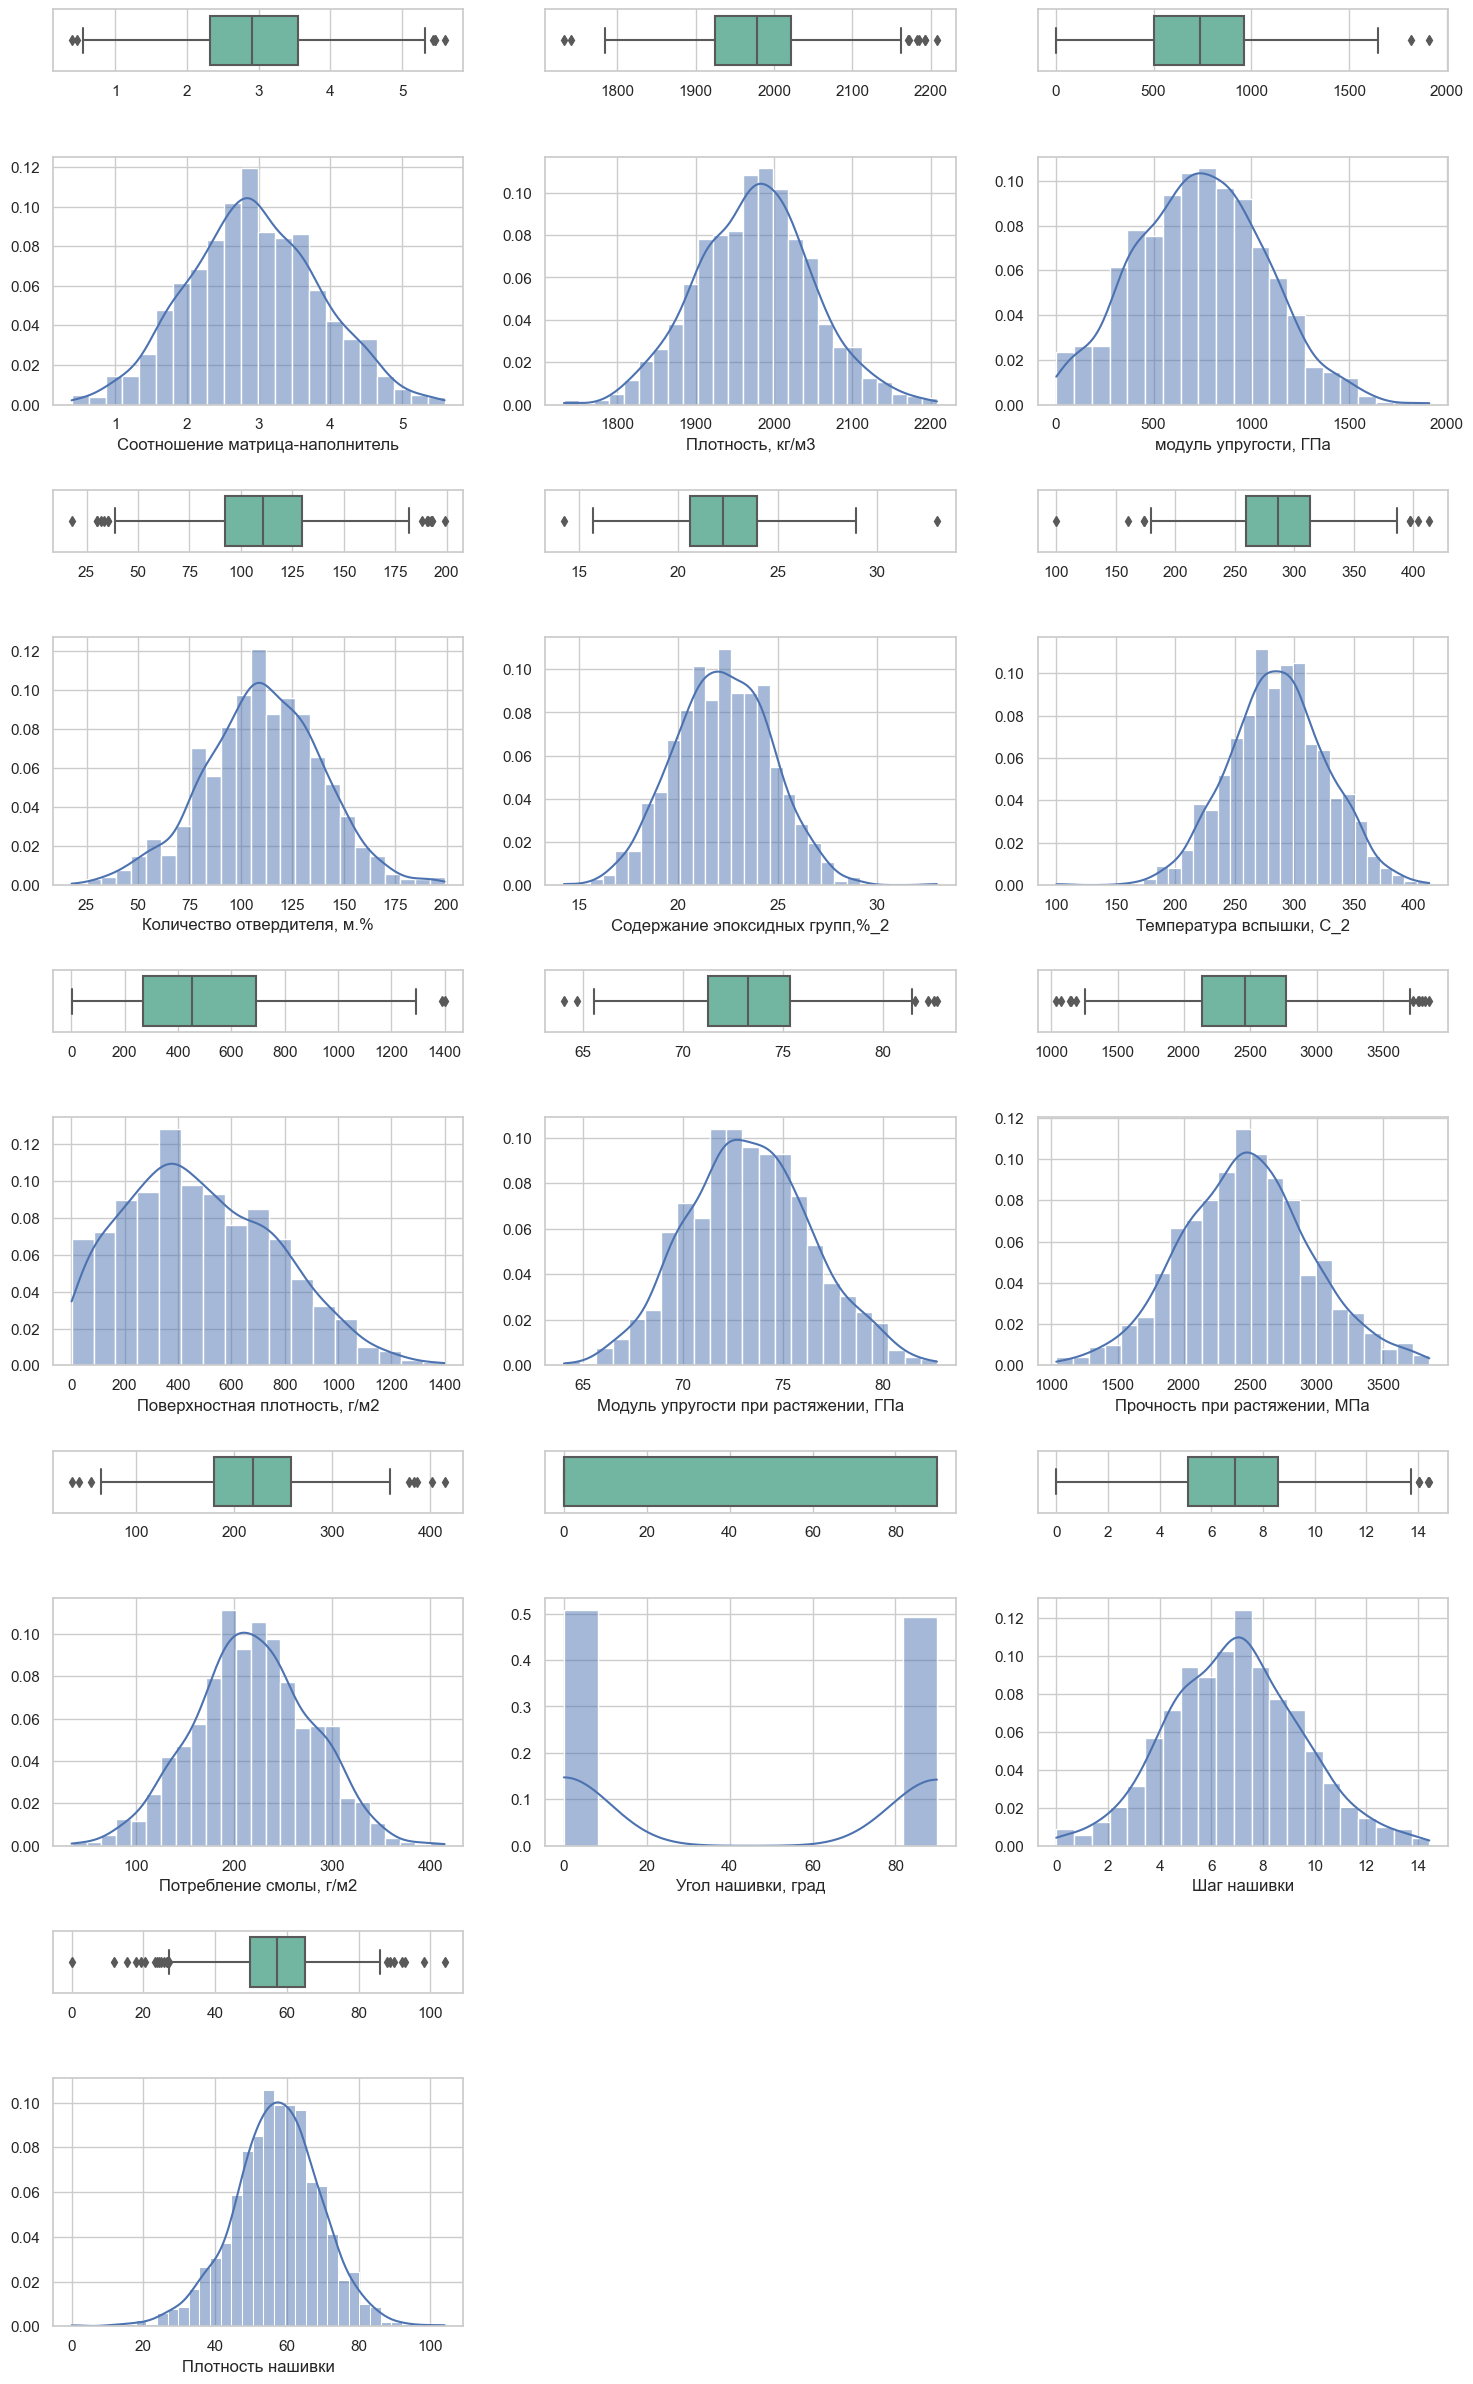

In [213]:
def visual(data, ncols=1):
    if len(data.shape) == 1:
        num_cols = 1
    else:
        num_cols = data.shape[1]
    if ncols > num_cols:
        ncols = num_cols
    spec = mpl.gridspec.GridSpec(ncols=ncols, nrows=num_cols * 2,
                                 height_ratios=[1, 4] * num_cols, hspace=0.55)
    fig = plt.figure(figsize=(18, (num_cols // ncols) * 20))
    i, j = -1, -1
    for l in range(num_cols):
        j += 1
        if not l % ncols:
            j = 0
            i += 1
        ax = fig.add_subplot(spec[2 * ncols * i + j])
        sns.boxplot(data=data, x=data.columns[ncols * i + j],
                    palette='Set2', ax=ax).set(xlabel=None)
        ax = fig.add_subplot(spec[2 * ncols * i + j + ncols])
        sns.histplot(x=data.columns[ncols * i + j], kde=True,
                     ax=ax, data=data, stat='probability').set(ylabel=None)
    plt.show()

visual(full_df, 3)


### Попарные графики рассеяния точек
По-прежнему ничего похожего на линейные зависимости нет. Серьезных выбросов не видно.


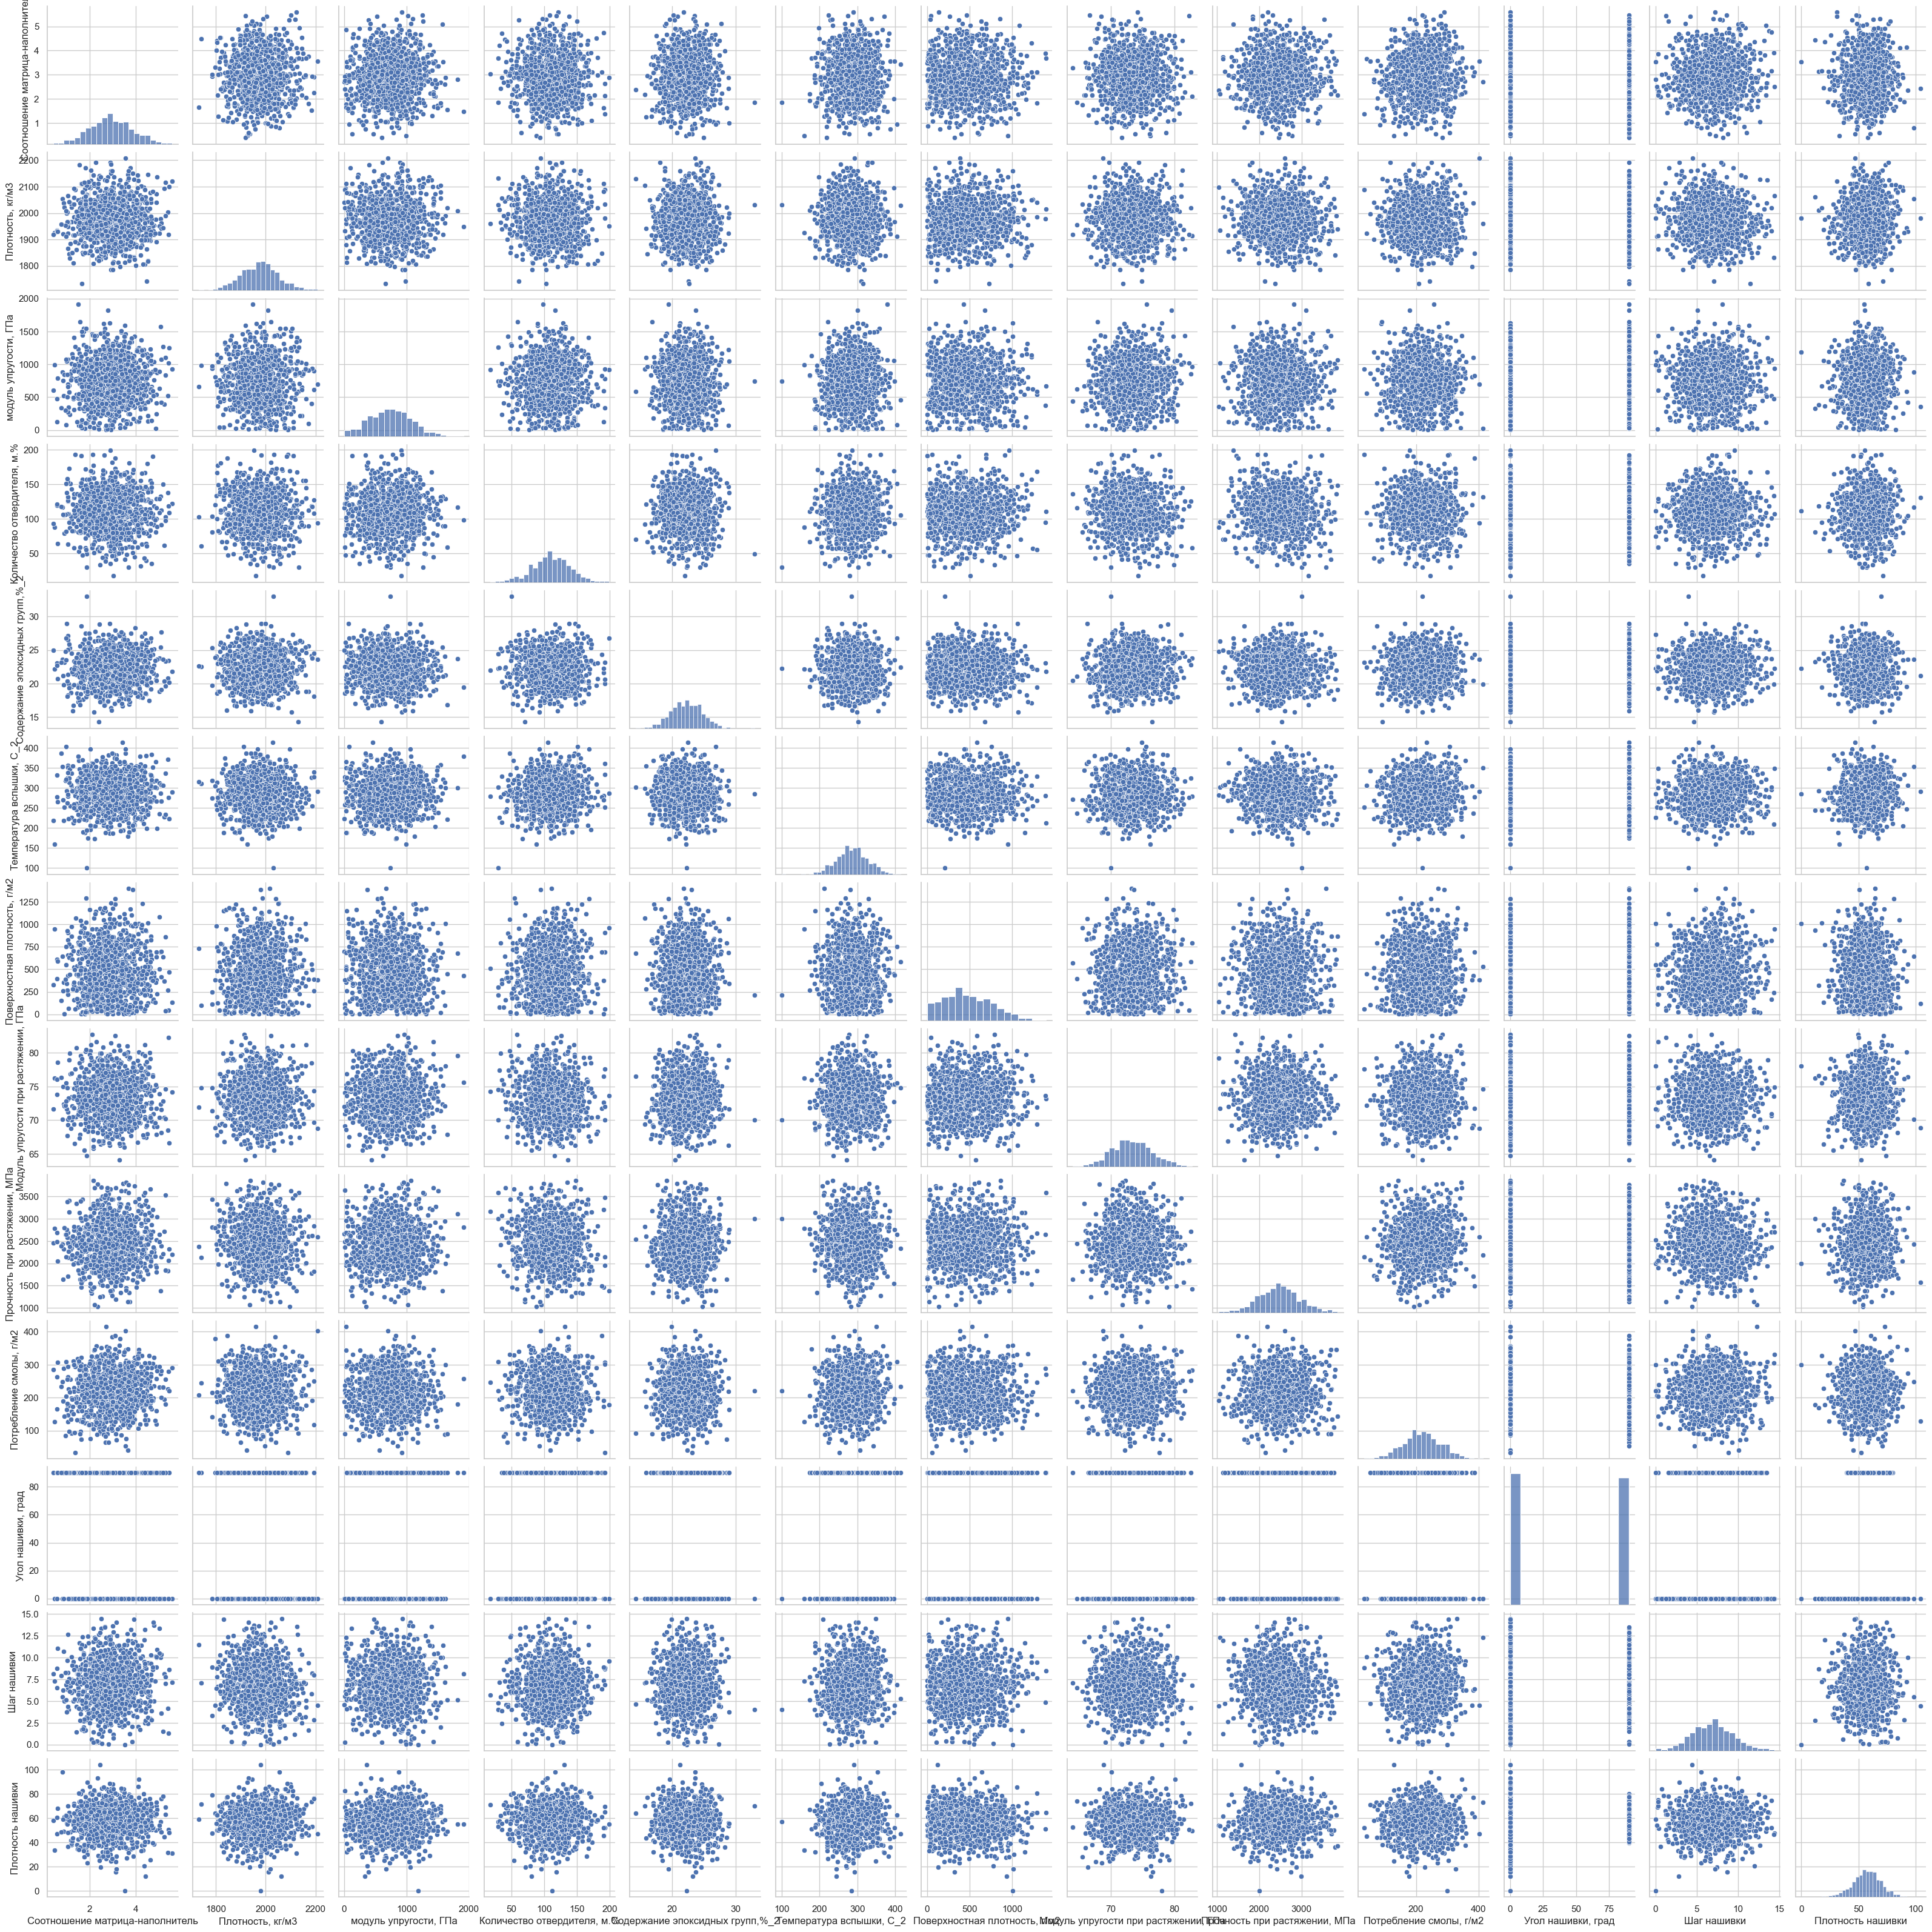

In [214]:
sns.pairplot(full_df)

### Среднее, медианное значение для каждой колонки

In [215]:
full_df.describe().loc[['mean', '50%']].T

mean          50%
Соотношение матрица-наполнитель          2.930366     2.906878
Плотность, кг/м3                      1975.734888  1977.621657
модуль упругости, ГПа                  739.923233   739.664328
Количество отвердителя, м.%            110.570769   110.564840
Содержание эпоксидных групп,%_2         22.244390    22.230744
Температура вспышки, С_2               285.882151   285.896812
Поверхностная плотность, г/м2          482.731833   451.864365
Модуль упругости при растяжении, ГПа    73.328571    73.268805
Прочность при растяжении, МПа         2466.922843  2459.524526
Потребление смолы, г/м2                218.423144   219.198882
Угол нашивки, град                      44.252199     0.000000
Шаг нашивки                              6.899222     6.916144
Плотность нашивки                       57.153929    57.341920

In [216]:
full_df.median() / full_df.mean() * 100

Соотношение матрица-наполнитель          99.198458
Плотность, кг/м3                        100.095497
модуль упругости, ГПа                    99.965009
Количество отвердителя, м.%              99.994638
Содержание эпоксидных групп,%_2          99.938655
Температура вспышки, С_2                100.005128
Поверхностная плотность, г/м2            93.605670
Модуль упругости при растяжении, ГПа     99.918495
Прочность при растяжении, МПа            99.700099
Потребление смолы, г/м2                 100.355154
Угол нашивки, град                        0.000000
Шаг нашивки                             100.245271
Плотность нашивки                       100.328919
dtype: float64

Поверхностная плотность, г/м2            93.605670

## Предобработка данных

### При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей.

In [308]:
def tt_split(data):
    """
    Разбивает выборку по заданым правилам
    """
    X = data.copy()
    y1 = X.pop('Модуль упругости при растяжении, ГПа')
    y2 = X.pop('Прочность при растяжении, МПа')
    
    #y = pd.concat([y1, y2], axis=1)
    #y = y1
    y = y2

    return train_test_split(X, y, test_size = 0.3, random_state = 32)


### Функция для сводной оценки

In [309]:
def est(note, model, data, prt=False):
    """
    Разбивает данные, обучает модель.
    Возвращает (и печатает) словарь с примечанием и оценками
    """
    X_train, X_test, y_train, y_test = tt_split(data)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res = {'note': [note],
           'r2': [r2_score(y_test, y_pred)],
           'MAE': [mean_absolute_error(y_test, y_pred)],
           'MAPE': [np.mean(np.abs((y_test - y_pred)/y_test))*100],}
    if prt:
        for k, v in res.items():
            print(k.rjust(5) + ':', v)
    return res

### Извлечение корня делает распределение правильнее визуально и дает небольшой прирост в точности
<br>

|          |    до    |  после   |
|----------|----------|----------|
|   r2     | 0.00856  | 0.00906 |
|  MAE     | 402.7968 | 402.6191 |
| MAPE     | 17.79%   | 17.78%   |



### Тестирование на линейном регрессоре

### Оценки до извлечения корня

In [310]:
est('До', LinearRegression(), full_df)

{'note': ['До'],
 'r2': [0.008562496106391926],
 'MAE': [402.7967688200463],
 'MAPE': [17.785224301365925]}

### Оценки после извлечения корня

In [311]:
w_df = full_df.copy()
w_df['Поверхностная плотность, г/м2'] = np.sqrt(w_df['Поверхностная плотность, г/м2'])

est('После', LinearRegression(), w_df)

{'note': ['После'],
 'r2': [0.00906407985801716],
 'MAE': [402.6191457937507],
 'MAPE': [17.77571827136706]}

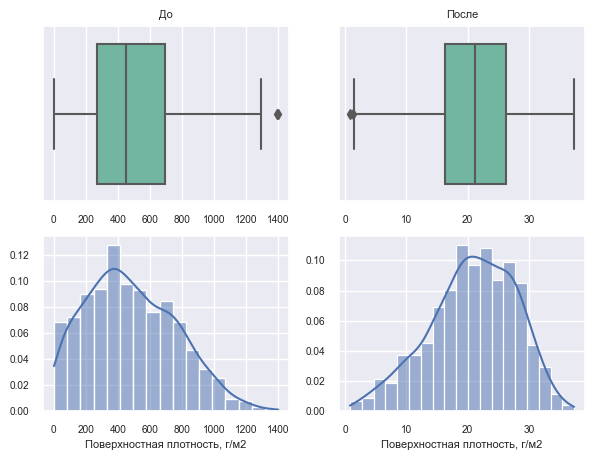

In [312]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=w_df, x=w_df['Поверхностная плотность, г/м2'],
            palette='Set2', ax=ax).set(xlabel=None, title='После')
ax = fig.add_subplot(2, 2, 4)
sns.histplot(x=w_df['Поверхностная плотность, г/м2'],
             kde=True, ax=ax, data=w_df, stat='probability').set(ylabel=None)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=full_df, x=full_df['Поверхностная плотность, г/м2'],
            palette='Set2', ax=ax).set(xlabel=None, title='До')
ax = fig.add_subplot(2, 2, 3)
sns.histplot(x=full_df['Поверхностная плотность, г/м2'],
             kde=True, ax=ax, data=full_df, stat='probability').set(ylabel=None)
plt.show()

### Функция для исключения выбросов

In [313]:
def ppc(data):
    """ 
    Удаляет выбросы
    """
    #абсолютное значение z-score для каждого наблюдения
    z = np.abs(stats.zscore(data))
    
    #сохраняйте только строки в кадре данных смодулем z-оценками меньше 3
    return data[(z<3).all(axis=1)]

### Попробую без выбросов

In [314]:
est('-выбросы', LinearRegression(), ppc(w_df))

{'note': ['-выбросы'],
 'r2': [0.024464868036547904],
 'MAE': [371.4943443350924],
 'MAPE': [16.57817026361976]}

без выбросов r2 лучше. Удаляю

In [315]:
w_df = ppc(w_df)

## Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.

In [316]:
w_df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1001.0     2.938832    0.908753   
Плотность, кг/м3                      1001.0  1975.506670   72.902107   
модуль упругости, ГПа                 1001.0   738.013623  327.515848   
Количество отвердителя, м.%           1001.0   110.857999   27.811487   
Содержание эпоксидных групп,%_2       1001.0    22.234355    2.382712   
Температура вспышки, С_2              1001.0   285.886112   40.278840   
Поверхностная плотность, г/м2         1001.0    20.785506    7.027353   
Модуль упругости при растяжении, ГПа  1001.0    73.309021    3.098147   
Прочность при растяжении, МПа         1001.0  2467.206874  484.973221   
Потребление смолы, г/м2               1001.0   218.311939   58.945161   
Угол нашивки, град                    1001.0    44.775225   45.021933   
Шаг нашивки                           1001.0     6.910262    2.557795   
Плотность нашивки                     1001.0    57.284861   11.841390   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.322801     2.913953   
Плотность, кг/м3                      1784.482245  1923.762595  1977.562320   
модуль упругости, ГПа                    2.436909   498.596429   739.664328   
Количество отвердителя, м.%             29.956150    92.618011   110.689775   
Содержание эпоксидных групп,%_2         15.695894    20.583309    22.220097   
Температура вспышки, С_2               173.484920   258.991905   285.811108   
Поверхностная плотность, г/м2            0.777007    16.344443    21.244053   
Модуль упругости при растяжении, ГПа    64.054061    71.252628    73.219286   
Прочность при растяжении, МПа         1036.856605  2135.779172  2459.524526   
Потребление смолы, г/м2                 41.048278   179.858423   218.946348   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.037639     5.082856     6.928247   
Плотность нашивки                       20.571633    49.994798    57.499988   

                                              75%          max  
Соотношение матрица-наполнитель          3.557018     5.591742  
Плотность, кг/м3                      2021.145909  2192.738783  
модуль упругости, ГПа                  957.395628  1649.415706  
Количество отвердителя, м.%            129.821713   192.851702  
Содержание эпоксидных групп,%_2         23.972972    28.955094  
Температура вспышки, С_2               313.023467   403.652861  
Поверхностная плотность, г/м2           26.311045    37.410458  
Модуль упругости при растяжении, ГПа    75.321098    82.525773  
Прочность при растяжении, МПа         2761.393722  3848.436732  
Потребление смолы, г/м2                257.495622   386.903431  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586463    14.440522  
Плотность нашивки                       64.916831    92.963492

### Обучение пяти моделей

In [317]:
lr = LinearRegression() #  Линейная регрессия
svr = make_pipeline(StandardScaler(), SVR()) #  Метод опорных векторов
rf = RandomForestRegressor() #  Случайный лес
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor()) #  Градиентный бустинг
lsr = Lasso() #  Лассо регрессор

### Функция для бучения и оценки

In [318]:
def mls(note, data):
    """
    Возвращает таблицу с результатами обучения
    """
      
    # В эту таблицу будут записываться результаты предсказаний
    df = pd.DataFrame(columns=['note', 'r2', 'MAE', 'MAPE'])

    # Линейная регрессия
    df = pd.concat([df, pd.DataFrame(est('lr' + note, lr, data))],
                   axis=0, ignore_index=True)


    # Метод опорных векторов
    # 'C': 1.0,
    # 'epsilon': 0.1,
    df = pd.concat([df, pd.DataFrame(est('svr' + note, svr, data))],
                   axis=0, ignore_index=True)


    # Случайный лес
    df = pd.concat([df, pd.DataFrame(est('rf' + note, rf, data))],
                   axis=0, ignore_index=True)


    # Градиентный бустинг
    df = pd.concat([df, pd.DataFrame(est('gbr' + note, gbr, data))],
                   axis=0, ignore_index=True)


    # Лассо регрессор
    df = pd.concat([df, pd.DataFrame(est('lsr' + note, lsr, data))],
                   axis=0, ignore_index=True)
    
    return df

### Добавим оценки в сводную таблицу

In [319]:
est_df = mls('', w_df) # обучение 5 моделей результаты в est_df
print(est_df.sort_values(by='r2', ascending=False))

  note        r2         MAE       MAPE
4  lsr  0.024670  371.433592  16.576802
0   lr  0.024465  371.494344  16.578170
1  svr  0.000878  375.125760  16.671367
2   rf -0.017881  385.781391  17.144403
3  gbr -0.040522  390.303296  17.297408


### При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

In [339]:
def scattgird(data, ncols=4):
    """
    Рисует серию точечных графиков
    """
    l = data.shape[1] - 2
    if ncols <1: ncols = 1
    if l < 1: l = 1
    nrows = int(np.ceil(l / ncols))

    fig = plt.figure(figsize=(3 * ncols, 4 * nrows))
    f = 'mean_test_score'

    for c in range(1, l + 1):
        if not (c - 1) % ncols:
            f = 'mean_test_score'
        sns.set(font_scale = 2/3)
        ax = fig.add_subplot(nrows, ncols, c)
        sns.scatterplot(data=data, ax=ax , legend=False,
                        x=data.columns[c - 1],
                        y='mean_test_score', 
                        hue='rank_test_score').set(ylabel=f)
        f = None
    plt.show()

In [341]:
def rs_viz(note, model, data, param_distr, ncols=4):
    """
    Визуализация случайного поиска гиперпараметров
     
    """

    rs = RandomizedSearchCV(
        model, n_iter = 30, cv = 10, verbose = 1, n_jobs=-1, random_state=32, scoring='r2',
        param_distributions=param_distr
        )

    X_train, X_test, y_train, y_test = tt_split(w_df)

    rs.fit(X_train, y_train)
    
    # дата фрейм с результатами случайного поиска гиперпараметров
    rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
    rs_df['mean_test_score'] = -rs_df['mean_test_score']
    rs_df = rs_df.drop([
                'mean_fit_time', 
                'std_fit_time', 
                'mean_score_time',
                'std_score_time', 
                'params', 
                'split0_test_score', 
                'split1_test_score', 
                'split2_test_score', 
                'std_test_score'],
                axis=1)
        
    # визуализация
    scattgird(rs_df, ncols)
    
    return pd.DataFrame(est(note + '-RS', rs.best_estimator_, data)), rs_df

    

### RandomForestRegressor
* n_estimators — число «деревьев» в «случайном лесу».
* max_features — число признаков для выбора расщепления.
* max_depth — максимальная глубина деревьев.
* min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
* min_samples_leaf — минимальное число объектов в листьях.
* bootstrap — использование для построения деревьев подвыборки с возвращением.


In [321]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


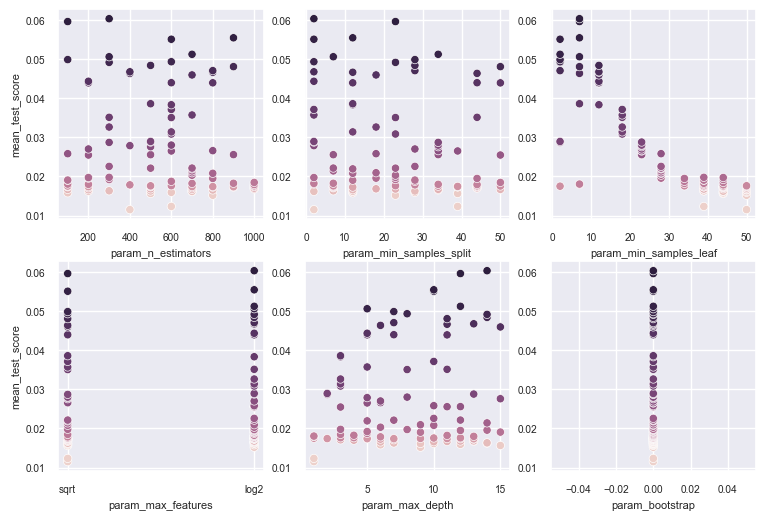

In [322]:
tmp = rs_viz('RF0', RandomForestRegressor(), w_df, {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)],
    'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)],
    'min_samples_leaf': [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)],
    'bootstrap': [False]
    })

est_df = pd.concat([est_df, tmp[0]], ignore_index=True)
print(est_df.sort_values(by='r2', ascending=False))

In [349]:
GSCV = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [180, 200, 210],
    'max_features': ['log2'],
    'max_depth': [1, 4, 13],
    'min_samples_split': [21, 23, 24],
    'min_samples_leaf': [50, 55, 60],
    'bootstrap': [True]
    },
    cv=2, scoring='r2')

X_train, X_test, y_train, y_test = tt_split(w_df)
GSCV.fit(X_train, y_train)
print(GSCV.best_estimator_ )

RandomForestRegressor(max_depth=1, max_features='log2', min_samples_leaf=55,
                      min_samples_split=21, n_estimators=180)


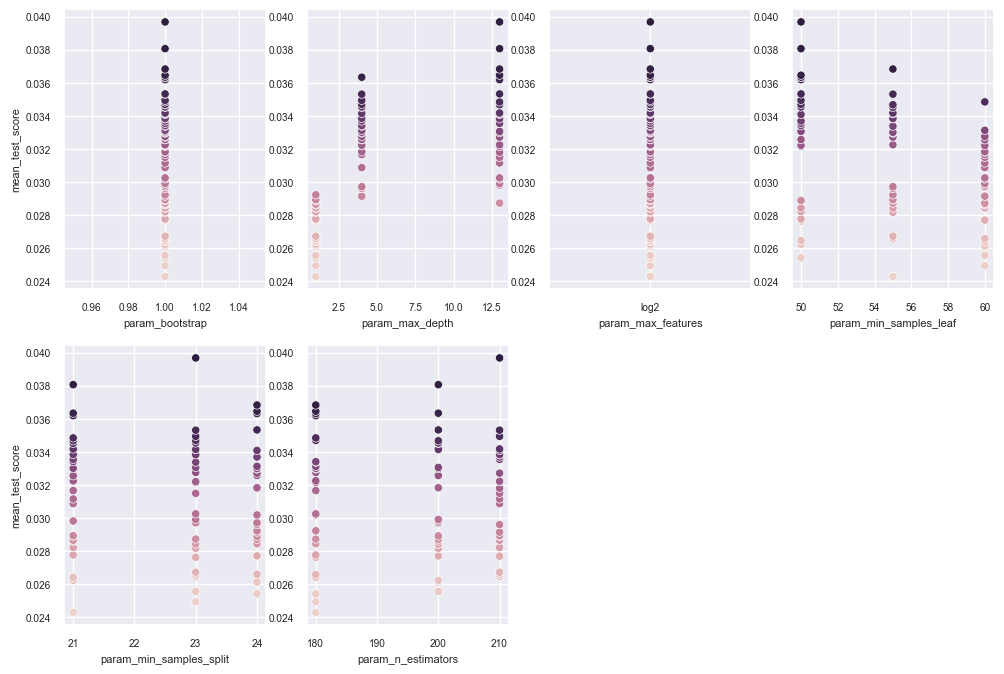

In [354]:
tm = pd.DataFrame(GSCV.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
tm['mean_test_score'] = -tm['mean_test_score']
tm = tm.drop(['mean_fit_time',
              'std_fit_time',
              'mean_score_time',
              'std_score_time',
              'params',
              'split0_test_score',
              'split1_test_score',
              'std_test_score'],
              axis=1)
        
    # визуализация
scattgird(tm, 4)

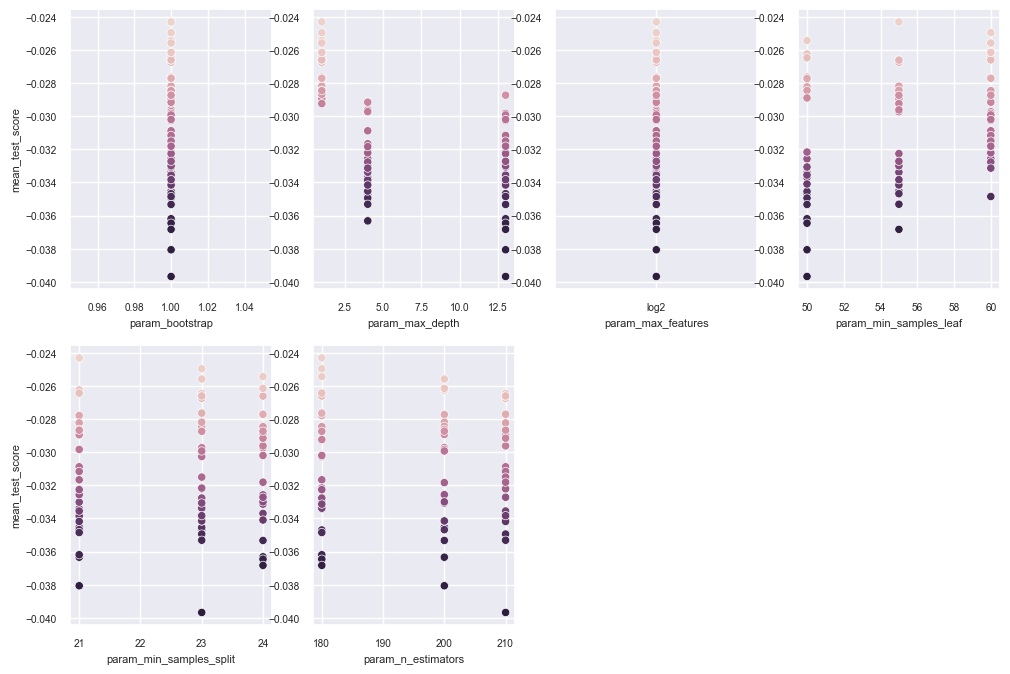

In [325]:
est_df = pd.concat([est_df, pd.DataFrame(est('GS-RF', GSCV.best_estimator_, w_df))], ignore_index=True)
est_df.sort_values(by='r2', ascending=False)


note        r2         MAE       MAPE
4    lsr  0.024670  371.433592  16.576802
0     lr  0.024465  371.494344  16.578170
6  GS-RF  0.015117  373.342547  16.685627
5  RS-RF  0.002593  374.790349  16.777695
1    svr  0.000878  375.125760  16.671367
2     rf -0.017881  385.781391  17.144403
3    gbr -0.040522  390.303296  17.297408

### SVR
* kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ Указывает тип ядра, который будет использоваться в алгоритме. Он должен быть одним из «линейных», «полигональных», «rbf», «сигмоидальных», «предварительно вычисленных» или вызываемых.

* degree int, default=3 Степень полиномиальной функции ядра («поли»). Игнорируется всеми другими ядрами.

* gamma {‘scale’, ‘auto’} or float, default=’scale’ Коэффициент ядра для «rbf», «poly» и «sigmoid». Eсли передается gamma='scale' (по умолчанию), то в качестве значения гаммы используется 1 / (n_features * X.var ()), если «авто», использует 1 / n_features.

* coef0 float, default=0.0 Независимый член в функции ядра. Это имеет значение только в «поли» и «сигмовидной».

* tol float, default=1e-3 Толерантность к критерию остановки.

* C float, default=1.0 Параметр регуляризации. Сила регуляризации обратно пропорциональна C. Должна быть строго положительной. Штраф представляет собой квадратичный штраф l2.

* epsilon float, default=0.1 Эпсилон в модели Эпсилон-СВР. Он определяет эпсилон-трубку, в пределах которой нет штрафных санкций в функции потери тренировки с очками, предсказанными на расстоянии эпсилон от фактического значения.

* shrinking bool, default=True Использовать ли эвристику сжатия.

* cache_size float, default=200 размер кэша ядра (в мегабайтах).

* verbose bool, default=False Включить многословный вывод.Обратите внимание,что эта настройка использует преимущества настройки времени выполнения каждого процесса в libsvm,которая,если она включена,может работать некорректно в многопоточном контексте.

* max_iter int, default=-1 Жесткий лимит на итерации внутри решателя,или -1 без ограничения.

In [326]:
SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [327]:
tmp = rs_viz('-SVR2', make_pipeline(StandardScaler(), SVR()), w_df, {
    'svr__C': [round(x, 3) for x in np.linspace(start = 1000, stop = 5000, num = 10)],
    'svr__epsilon': [round(x, 3) for x in np.linspace(start = 0.001, stop = 0.5, num = 10)],
    'svr__kernel': ['rbf'],
    'svr__gamma': ['scale']#[round(x, 3) for x in np.linspace(start = 0.001, stop = 0.999, num = 5)]
    },
    ncols=2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [329]:
est_df = pd.concat([est_df, tmp[0]], ignore_index=True)
est_df.sort_values(by='r2', ascending=False)

note        r2         MAE       MAPE
4      lsr  0.024670  371.433592  16.576802
0       lr  0.024465  371.494344  16.578170
6    GS-RF  0.015117  373.342547  16.685627
5    RS-RF  0.002593  374.790349  16.777695
1      svr  0.000878  375.125760  16.671367
2       rf -0.017881  385.781391  17.144403
3      gbr -0.040522  390.303296  17.297408
7  RS-SVR2 -0.170632  412.699934  18.234525

In [330]:
GSCV = GridSearchCV(make_pipeline(StandardScaler(), SVR()), {
    'svr__C': [0.05, 0.1, 0.5],
    'svr__epsilon': [0.1, 3.4, 6.7],
    'svr__gamma': ['scale', 0.5, 0.75]
    },
    cv=3, scoring='r2')

X_train, X_test, y_train, y_test = tt_split(w_df)
GSCV.fit(X_train, y_train)
print(GSCV.best_estimator_ )

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.5, epsilon=6.7, gamma=0.5))])


In [331]:
est_df = pd.concat([est_df, pd.DataFrame(est('GS-SVR0', GSCV.best_estimator_, w_df))], ignore_index=True)
est_df.sort_values(by='r2', ascending=False)

note        r2         MAE       MAPE
4      lsr  0.024670  371.433592  16.576802
0       lr  0.024465  371.494344  16.578170
6    GS-RF  0.015117  373.342547  16.685627
5    RS-RF  0.002593  374.790349  16.777695
1      svr  0.000878  375.125760  16.671367
8  GS-SVR0  0.000008  375.254000  16.666770
2       rf -0.017881  385.781391  17.144403
3      gbr -0.040522  390.303296  17.297408
7  RS-SVR2 -0.170632  412.699934  18.234525

##  GradientBoostingRegressor
* learning_rate : float, optional (default=0.1) ключевой для настройки параметр
* n_estimators: int (default=100) Количество «boosting stages» при обучении модели градиентного бустинга
* max_depth: integer, optional (default=3) Максимальная глубина отдельных регрессионных оценок. Максимальная глубина ограничивает количество узлов в дереве.
* criterion: string, optional (default=«friedman_mse») Функция измерения качества разделения. Поддерживаемые критерии: «friedman_mse» для среднеквадратичной ошибки с оценкой улучшения по Фридману, «mse» для среднеквадратичной ошибки и «mae» для средней абсолютной ошибки. Значение по умолчанию «friedman_mse», как правило, является лучшим, поскольку в некоторых случаях оно может обеспечить лучшее приближение.
* min_samples_split: int, float, optional (default=2) Минимальное количество примеров, необходимое для продолжения достраивания дерева в данной вершине при обучении. Попробуем изменить его.
* min_samples_leaf: int, float, optional (default=1) Минимальное количество примеров, которое может находиться в листе дерева после обучения. Увеличение этого параметра снижает качество предсказания на тренировочной выборке (т. к. при меньшем значении деревья, составляющие ансамбль в большей степени подстраиваются под каждый конкретный пример из обучающей выборки) и, если повезет, повышает качество на валидационной. То есть, по крайней мере теоретически, помогает бороться с переобучением.
* min_weight_fraction_leaf: float, optional (default=0.) Минимальная часть примеров, необходимая для формирования листа. По умолчанию их количество равно нулю, то есть не задает никакого ограничения. По идее, увеличение значения этого параметра должно препятствовать переобучению, подобно параметру mean_samples_leaf.

In [332]:
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())

In [336]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

  'gradientboostingregressor__learning_rate': 0.55,
  'gradientboostingregressor__n_estimators': 100,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__min_samples_split': 4
  'gradientboostingregressor__min_samples_leaf': 5 ,
  'gradientboostingregressor__random_seed': 0

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\ritul\anaconda3\envs\BKP\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ritul\anaconda3\envs\BKP\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ritul\anaconda3\envs\BKP\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\ritul\anaconda3\envs\BKP\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()


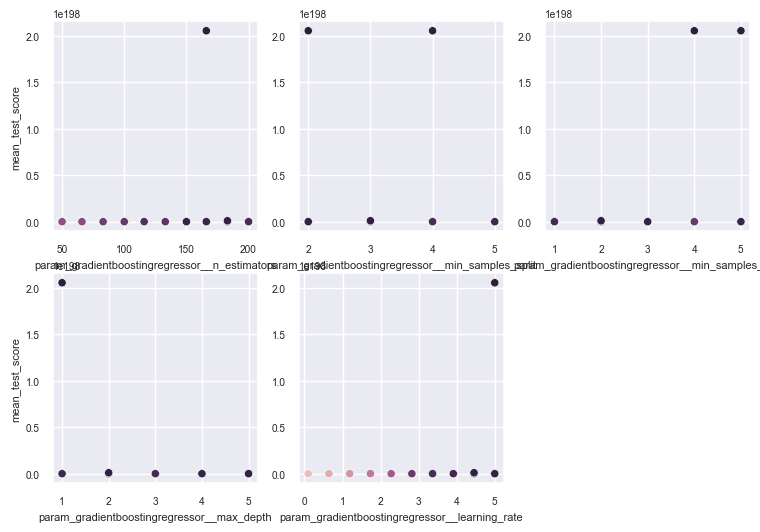

In [334]:
tmp = rs_viz('-GBR0', make_pipeline(StandardScaler(), GradientBoostingRegressor()), w_df, {
    'gradientboostingregressor__learning_rate': [round(x, 4) for x in np.linspace(start = 0.1, stop = 5, num = 10)],
    'gradientboostingregressor__n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)],
    'gradientboostingregressor__max_depth': [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)],
    'gradientboostingregressor__min_samples_split': [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)],
    'gradientboostingregressor__min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)],
    },
    ncols=3)

In [ ]:
est_df = pd.concat([est_df, tmp[0]], ignore_index=True)
est_df.sort_values(by='r2', ascending=False)

note        r2         MAE       MAPE
4      lsr  0.024670  371.433592  16.576802
0       lr  0.024465  371.494344  16.578170
6    GS-RF  0.013991  373.648496  16.705381
5    RS-RF  0.009883  375.275161  16.764604
9  RS-GBR0  0.002774  376.175625  16.787945
1      svr  0.000878  375.125760  16.671367
7  RS-SVR2  0.000320  375.214262  16.668597
8  GS-SVR0  0.000008  375.254000  16.666770
2       rf -0.020832  385.711067  17.201098
3      gbr -0.037995  390.143994  17.288854